# 서울시 청소년 정신건강 분석

In [1]:
import numpy as np
import pandas as pd

## 서울시 청소년들의 스트레스 데이터를 읽어보자

In [2]:
# 엑셀파일을 읽기위해서는 내부적으로 xlrd 모듈이 설치되어 있어야 한다.
pd.read_excel("../data/Report1.xls")

,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [3]:
pd.read_excel("../data/Report1.xls", header=1)

,기간,구분,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [4]:
pd.read_excel("../data/Report1.xls", header=1, usecols="C:K")

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [5]:
col_names = ['스트레스', '스트레스남학생', '스트레스여학생', '우울감경험률', 
             '우울남학생', '우울여학생','자살생각율', '자살남학생', '자살여학생']

pd.read_excel("../data/Report1.xls", header=1, 
              usecols="C:K", names=col_names)

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [6]:
raw_data = pd.read_excel("../data/Report1.xls", 
                         header=1, 
                         usecols="C:K", 
                         names=col_names)
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [7]:
raw_data.loc[1] = 100 - raw_data.loc[0]
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [8]:
raw_data['응답'] = ['그렇다', '아니다']
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [9]:
# set_index() : 인덱스를 다른 컬럼으로 교체
# drop = True : 인덱스를 해제하고 남은 데이터를 컬럼으로 사용할 것인지 여부
# inplace= True: DataFrame의 내용을 갱신할 것인지 여부

raw_data.set_index('응답', drop=True, inplace=True)
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울감경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'D2Coding'

In [11]:
raw_data['스트레스']

응답
그렇다    42.7
아니다    57.3
Name: 스트레스, dtype: float64

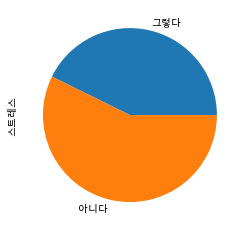

In [12]:
raw_data['스트레스'].plot.pie()

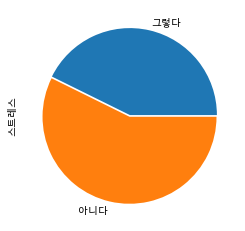

In [13]:
raw_data['스트레스'].plot.pie(explode=[0,0.02]); 

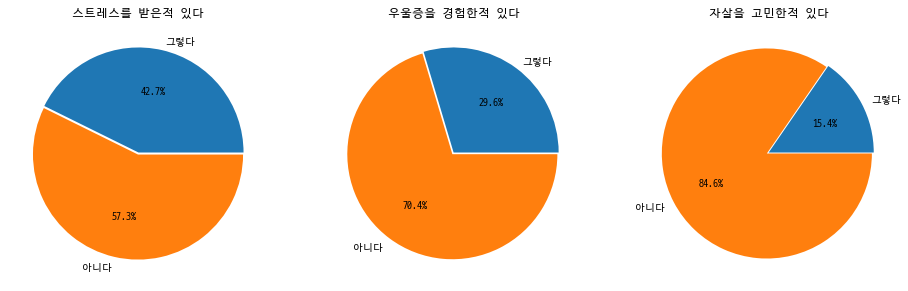

In [14]:
# subplots : 1행 3열로 plot을 배치, figure와 axes 객체를 반환
# figsize : 전체 그림의 크기
f, ax = plt.subplots(1,3, figsize=(16,8))

raw_data['스트레스'].plot.pie(explode=[0,0.02], ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('스트레스를 받은적 있다')
ax[0].set_ylabel('')

raw_data['우울감경험률'].plot.pie(explode=[0,0.02], ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('우울증을 경험한적 있다')
ax[1].set_ylabel('')

raw_data['자살생각율'].plot.pie(explode=[0,0.02], ax=ax[2], autopct='%1.1f%%')
ax[2].set_title('자살을 고민한적 있다')
ax[2].set_ylabel('')

plt.show()